Reading Dataset From Csv File

In [1]:
import pandas as pd
data = pd.read_csv('/kaggle/input/new-crop-dataset/crop_yeld.csv')

In [2]:
df = data

In [3]:
df.head(5)

,Soil Depth,PH,Salnity,OC,N,P,K,Crop,Rainfall,Humidity,Min_Temp,Max_temp,Wind_Speed,Season,Yield
0,Medium,8.02,0.53,0.52,173.11,21.83,399.17,Cotton,560.7,77.0,22.1,39.5,23.0,Kharif,13
1,Low,7.80,0.55,0.57,158.68,17.45,409.25,Cotton,520.0,75.0,22.1,39.9,21.6,Kharif,15
2,Low,7.90,0.40,0.51,165.58,14.37,401.05,Cotton,520.0,75.0,22.1,39.9,21.6,Kharif,15
3,Low,8.00,0.42,0.44,183.14,17.11,395.81,Cotton,520.0,75.0,22.1,39.9,21.6,Kharif,12
4,Medium,7.90,0.53,0.37,132.97,18.85,464.89,Cotton,560.7,77.0,22.1,39.5,23.0,Kharif,12


In [4]:
Crop_names = {
    'Cotton':0,
    'Black Gram':1,
    'Jowar':2,
    'Maize':3,
    'Bajra':4,
    'Chickpea':5,
    'Pigeon_Peas':6,
    'Soyabean':7,
}

Season = {
    'Kharif':0,
    'Rabbi':1
}

Soil_Depth = {
    'Low':0,
    'Medium':1
}

In [5]:
df = df.replace(to_replace=Crop_names)
df = df.replace(to_replace=Season)
df = df.replace(to_replace=Soil_Depth)

In [6]:
column_names = []
for i in df.columns:
    column_names.append(i)

In [7]:
column_names.remove("Yield")

In [8]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

In [9]:
Y = pd.DataFrame(df['Yield'])

In [10]:
X = df.drop('Yield',axis=1)

In [11]:
X = sc_X.fit_transform(X)
Y = sc_y.fit_transform(Y)

In [12]:
X1 = pd.DataFrame(X, columns = column_names)

In [13]:
Y1= pd.DataFrame(Y,columns= ["Yield"])

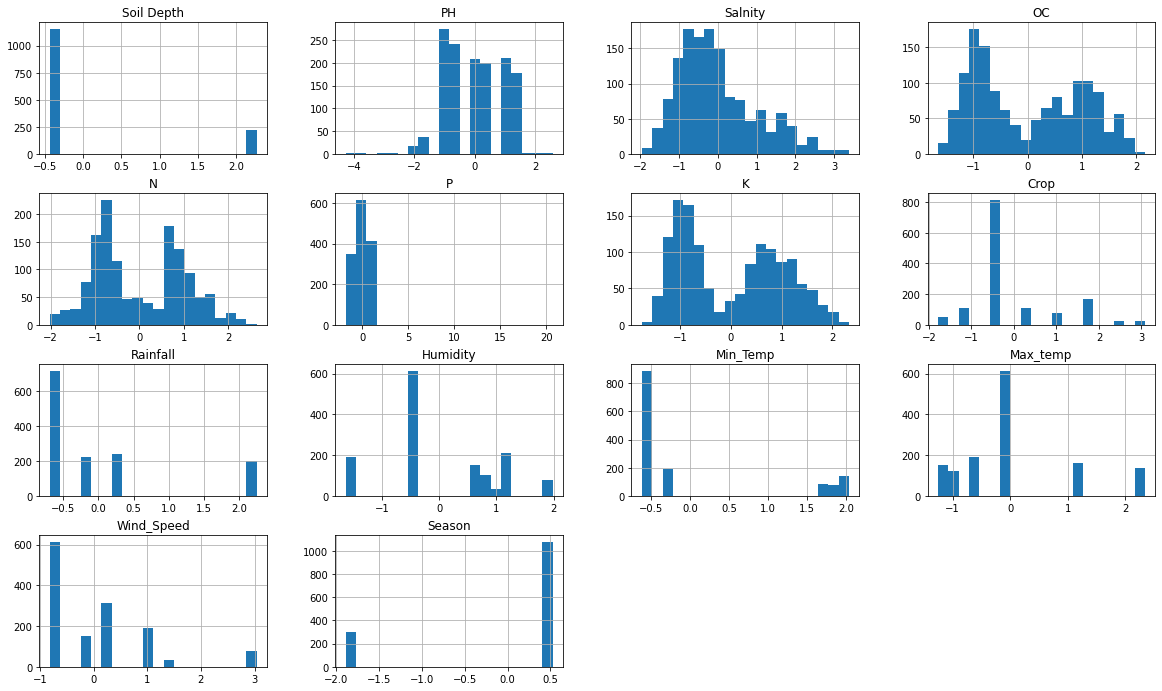

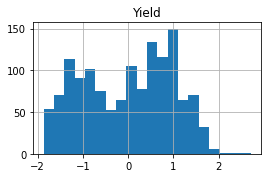

In [14]:
import matplotlib.pyplot as plt
X1.hist(layout=(5,4), figsize=(20,15), bins=20)
Y1.hist(layout=(5,4), figsize=(20,15), bins=20)
plt.show()

In [15]:
frame = [X1,Y1]
data = pd.concat(frame,axis=1)

In [16]:
!pip install  dabl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 563.9/563.9 kB 1.6 MB/s eta 0:00:00


Target looks like regression


[<AxesSubplot:title={'center':'Target distribution'}, xlabel='Yield', ylabel='frequency'>,
 array([[<AxesSubplot:title={'center':'F=7.02E-01'}, xlabel='N', ylabel='Yield'>,
         <AxesSubplot:title={'center':'F=6.57E-01'}, xlabel='OC'>,
         <AxesSubplot:title={'center':'F=5.03E-01'}, xlabel='K'>,
         <AxesSubplot:title={'center':'F=-4.64E-01'}, xlabel='Max_temp (jittered)'>],
        [<AxesSubplot:title={'center':'F=-4.61E-01'}, xlabel='Humidity (jittered)', ylabel='Yield'>,
         <AxesSubplot:title={'center':'F=4.60E-01'}, xlabel='P'>,
         <AxesSubplot:title={'center':'F=-3.94E-01'}, xlabel='Min_Temp (jittered)'>,
         <AxesSubplot:title={'center':'F=-3.90E-01'}, xlabel='Wind_Speed (jittered)'>],
        [<AxesSubplot:title={'center':'F=3.09E-01'}, xlabel='Salnity', ylabel='Yield'>,
         <AxesSubplot:title={'center':'F=1.63E-01'}, xlabel='PH (jittered)'>,
         <AxesSubplot:title={'center':'F=-1.41E-01'}, xlabel='Crop (jittered)'>,
         <AxesSubplot

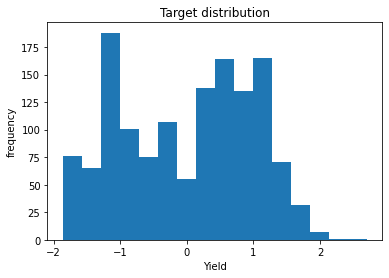

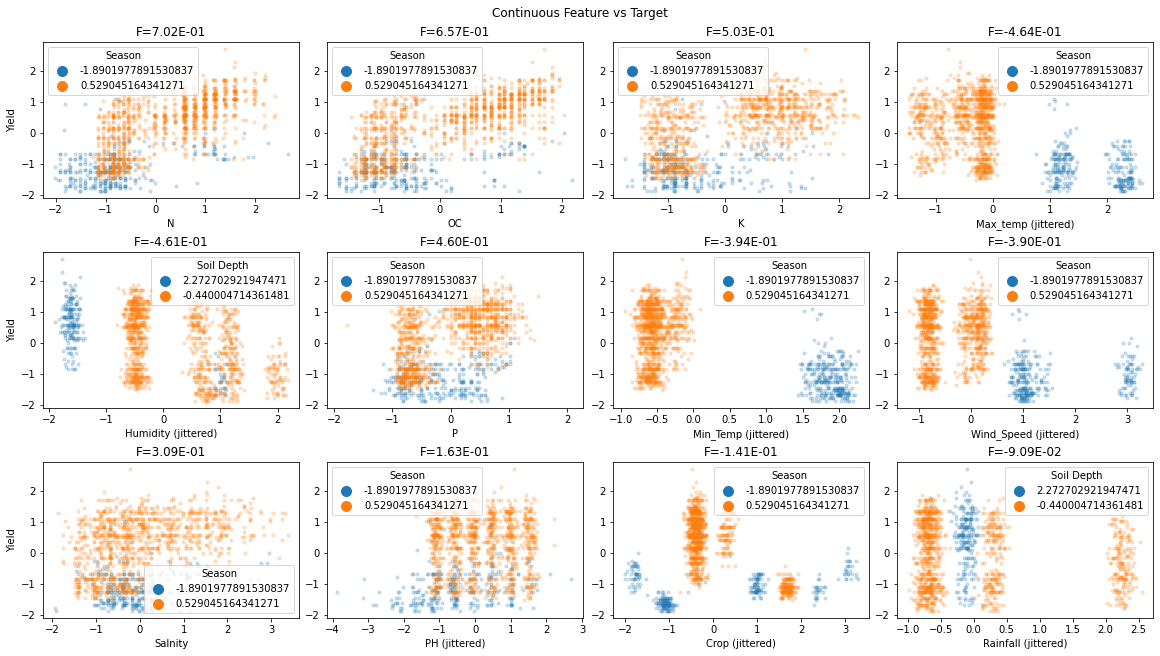

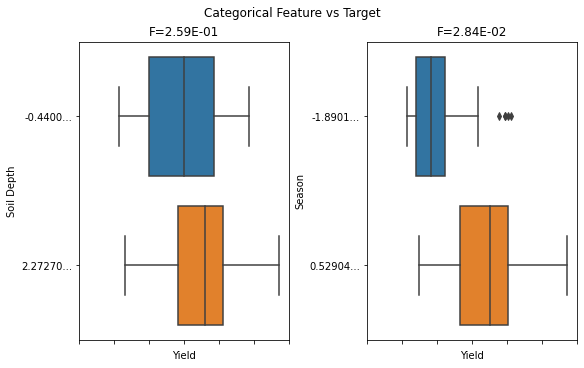

In [17]:
import dabl
dabl.plot(data, target_col="Yield")

<Figure size 1440x1440 with 0 Axes>

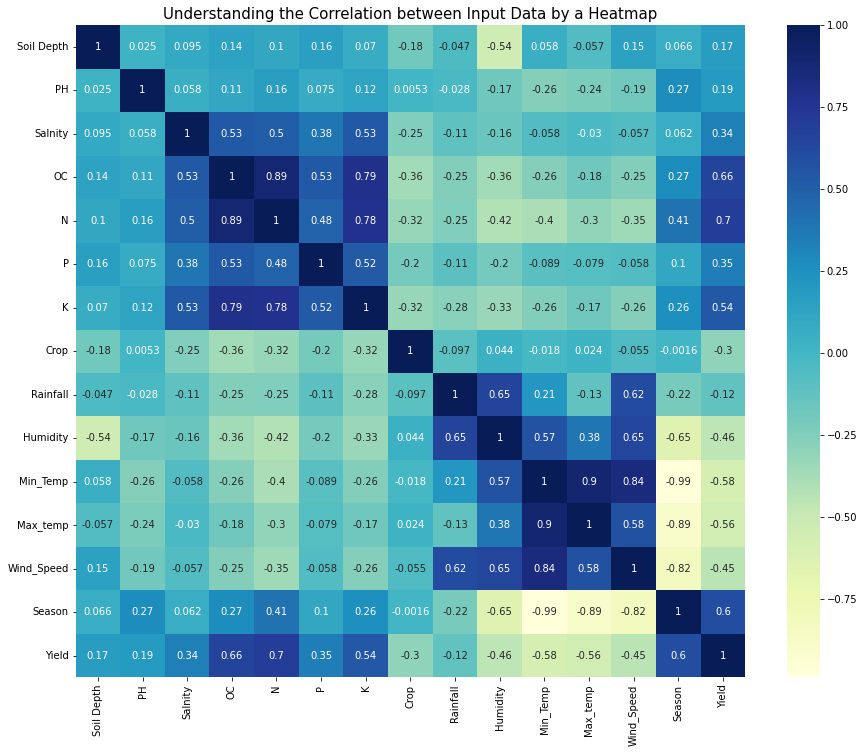

In [18]:
import seaborn as sns
plt.figure(figsize=(20,20))
c = data.corr()
plt.figure(figsize=(15,12))
sns.heatmap(c, annot=True, cmap="YlGnBu")
plt.title('Understanding the Correlation between Input Data by a Heatmap', fontsize=15)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [20]:
from sklearn.svm import SVR
svr_regressor = SVR(kernel = 'rbf')
svr_regressor.fit(x_train, y_train.ravel())

SVR()

In [21]:
sc_y.inverse_transform(svr_regressor.predict(sc_X.transform([[0, 8.02, 0.54, 0.67, 173.11, 21.83, 399.17, 3,560, 77, 22, 40, 20, 0]])).reshape(-1,1))

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[10.29701864]])

In [22]:
sc_y.inverse_transform(svr_regressor.predict(sc_X.transform([[0, 8.02, 0.54, 0.67, 173.11, 21.83, 399.17, 3, 560, 77, 22, 40, 20, 0]])).reshape(-1,1))

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[10.29701864]])

In [23]:
y_pred = svr_regressor.predict(x_test)

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import r2_score

print('MSE =', mse(y_pred, y_test))
print('MAE =', mae(y_pred, y_test))
print('R2 Score =', r2_score(y_pred, y_test))
print('MAPE =', mape(y_pred, y_test))

MSE = 0.1670388177004114
MAE = 0.3200038311794199
R2 Score = 0.7836548359702017
MAPE = 1.3691955545521939


In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [25]:
from sklearn.ensemble import RandomForestRegressor
random_forest= RandomForestRegressor(n_estimators=1000,max_samples = 0.8,oob_score=True)
random_forest.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(max_samples=0.8, n_estimators=1000, oob_score=True)

In [26]:
y_pred = random_forest.predict(x_test)

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import r2_score

print('MSE =', mse(y_pred, y_test))
print('MAE =', mae(y_pred, y_test))
print('R2 Score =', r2_score(y_pred, y_test))
print('MAPE =', mape(y_pred, y_test))

MSE = 0.21266241341302974
MAE = 0.3431958454714695
R2 Score = 0.7303394282157782
MAPE = 1.5433376637150211


In [27]:
from sklearn.ensemble import BaggingRegressor
bag = BaggingRegressor(base_estimator=RandomForestRegressor(), n_estimators=1000,).fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


In [28]:
y_pred = bag.predict(x_test)

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import r2_score

print('MSE =', mse(y_pred, y_test))
print('MAE =', mae(y_pred, y_test))
print('R2 Score =', r2_score(y_pred, y_test))
print('MAPE =', mape(y_pred, y_test))

MSE = 0.20686055102944723
MAE = 0.34038211845818533
R2 Score = 0.7320146910670813
MAPE = 1.6679089454627223


In [29]:
# def pred(ph,salinity,OC,N,P,K,OF,Urea,SSP,MOP,Rainfall,Humidity,Min_Temp,Max_Temp,Wind_Speed,Crop,Season,Location=0):
def pred(ph,salinity,OC,N,P,K,OF,Urea,SSP,MOP,Rainfall,Humidity,Min_Temp,Max_Temp,Wind_Speed,Crop,Season,location=0):
    X = [location,ph,salinity,OC,N,P,K,Crop,OF,Urea,SSP,MOP,Rainfall,Humidity,Min_Temp,Max_Temp,Wind_Speed,Season]
    ans = sc_y.inverse_transform(svr_regressor.predict(sc_X.transform([X])).reshape(-1,1))
    print(ans)
                                 
#     ans = random_forest.predict([X])
#     print(f"Yield is {ans[0]} Quintal per hectare")

In [30]:
def pred(ph,salinity,OC,N,P,K,Rainfall,Humidity,Min_Temp,Max_Temp,Wind_Speed,Crop,Season,location='High'):
    C = {
    'Cotton':0,
    'Black Gram':1,
    'Jowar':2,
    'Maize':3,
    'Bajra':4,
    'Chickpea':5,
    'Pigeon_Peas':6,
    'Soyabean':7,
    }

    S = {
    'Kharif':0,
    'Rabbi':1
    }
    Location = {
    'Low':0,
    'High':1
    }
    location1 = Location[location]
    Crop1 = C[Crop]
    Season1 = S[Season]
    X = [location1,ph,salinity,OC,N,P,K,Crop1,Rainfall,Humidity,Min_Temp,Max_Temp,Wind_Speed,Season1]
    ans = sc_y.inverse_transform(svr_regressor.predict(sc_X.transform([X])).reshape(-1,1))
    print(ans)
    

In [31]:
pred(8.02,0.53,0.52,173.11,21.83,399.17,560,77,22,40,20,'Cotton','Kharif')

[[13.00299977]]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [32]:
pred(8.02,0.53,0.82,173.11,21.83,399.17,560,77,22,40,20,'Jowar','Rabbi')

[[18.48198967]]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [33]:
pred(7.50,0.60,0.39,43.90,14.42,391.10,589,78,20,37,21,'Maize','Kharif')

[[12.316088]]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [34]:
pred(7.70,0.63,0.89,181.89,24.37,419.33,589,78,20,37,21,'Jowar','Rabbi')
# ph,salinity,OC,N,P,K,OF,Urea,SSP,MOP,Rainfall,Humidity,Min_Temp,Max_Temp,Wind_Speed,Crop,Season,location=0

[[22.6215876]]


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [35]:
from pickle import dump

In [36]:
dump(svr_regressor, open('svr_model.pkl', 'wb'))
dump(sc_X, open('scaler_X.pkl', 'wb'))
dump(sc_y, open('scaler_y.pkl', 'wb'))

In [37]:
./scaler_y.pkl

SyntaxError: invalid syntax (1647862405.py, line 1)

In [ ]:
from pickle import load

In [ ]:
model = load(open('svr_model.pkl', 'rb'))
scalerx = load(open('scaler_X.pkl', 'rb'))
scalery = load(open('scaler_y.pkl', 'rb'))

In [ ]:
def pred(ph,salinity,OC,N,P,K,Rainfall,Humidity,Min_Temp,Max_Temp,Wind_Speed,Crop,Season,location='High'):
    C = {
    'Cotton':0,
    'Black Gram':1,
    'Jowar':2,
    'Maize':3,
    'Bajra':4,
    'Chickpea':5,
    'Pigeon_Peas':6,
    'Soyabean':7,
    }

    S = {
    'Kharif':0,
    'Rabbi':1
    }
    Location = {
    'Low':0,
    'High':1
    }
    location1 = Location[location]
    Crop1 = C[Crop]
    Season1 = S[Season]
    X = [location1,ph,salinity,OC,N,P,K,Crop1,Rainfall,Humidity,Min_Temp,Max_Temp,Wind_Speed,Season1]
    ans = sc_y.inverse_transform(svr_regressor.predict(sc_X.transform([X])).reshape(-1,1))
    print(ans)

In [ ]:
pred(7.70,0.63,0.89,181.89,24.37,419.33,589,78,20,37,21,'Jowar','Rabbi')